**1. Giriş ve Veri Yükleme**

Kütüphanelerin İçe Aktarılması: Pandas ve diğer gerekli kütüphaneleri içe aktarın.

Veri Setinin Yüklenmesi: Kaggle'dan yüklenen e-ticaret veri setini yükleyin.

# Veri setini yükle
df = pd.read_csv('/kaggle/input/e_commerce_data.csv')



In [9]:
#Kütüphaneleri içe aktarma

import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings   # hataları görmezden geleme 
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier   #  diğer algoritmalar 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score

In [10]:
df=pd.read_csv('E_Commerce_Dataset.csv')
data=df.copy()

<img src="https://image.milimaj.com/i/milliyet/75/0x0/5fdd4cf855427e0814e55fdc.jpg">

**2. Veri Keşfi ve Ön İşleme**

Veri Setinin İlk Bakış: Veri setini gözden geçirin ve ilk birkaç satırı inceleyin.

Eksik Veri Kontrolü: Eksik verileri kontrol edin ve gerekirse eksik verileri işleyin veya doldurun.

Veri Türlerinin Kontrolü: Her bir sütunun veri türlerini kontrol edin ve uygun dönüşümleri yapın.

Kategorik Değişkenlerin Kodlanması: Kategorik değişkenleri sayısal değerlere dönüştürün.


In [11]:
df.head()

,Ürün Adı,Kategori,Marka,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,Ürün5,Ev & Bahçe,Marka5,55,96,283,1,1.9,2024-02-17 15:18:45.291585
1,Ürün8,Kozmetik,Marka1,120,37,835,11,4.0,2023-07-21 15:18:45.292898
2,Ürün8,Aksesuar,Marka5,110,14,457,3,2.9,2024-03-19 15:18:45.293026
3,Ürün9,Ev & Bahçe,Marka4,133,7,254,8,4.7,2024-03-01 15:18:45.293077
4,Ürün2,Ev & Bahçe,Marka3,268,80,35,12,3.5,2024-05-21 15:18:45.293117


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ürün Adı       1000 non-null   object 
 1   Kategori       1000 non-null   object 
 2   Marka          1000 non-null   object 
 3   Fiyat          1000 non-null   int64  
 4   Stok Miktarı   1000 non-null   int64  
 5   Satış Sayısı   1000 non-null   int64  
 6   Yorum Sayısı   1000 non-null   int64  
 7   Ortalama Puan  1000 non-null   float64
 8   Tarih          1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [13]:
df.describe()

,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,259.230000,50.301000,506.240000,24.870000,2.998900
std,138.472625,29.489388,283.187418,14.647513,1.154418
min,10.000000,0.000000,1.000000,0.000000,1.000000
25%,140.000000,24.000000,265.750000,13.000000,2.000000
50%,257.000000,51.000000,522.000000,25.000000,3.000000
75%,376.000000,76.000000,743.250000,37.000000,4.000000
max,500.000000,100.000000,1000.000000,50.000000,5.000000


In [14]:
df.isnull().sum()  #  eksik veri yok 
df.columns

Index(['Ürün Adı', 'Kategori', 'Marka', 'Fiyat', 'Stok Miktarı',
       'Satış Sayısı', 'Yorum Sayısı', 'Ortalama Puan', 'Tarih'],
      dtype='object')

In [15]:
# Kategorical to numeric 

df.Kategori.unique() # kategorikleri numeri çevirilecek olanlar bular olucak 
df.Marka.unique()    # aynı şekilde bunun için de geçerli 
df['Ürün Adı'].unique()
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['Kategori'] = le.fit_transform(df['Kategori'])
df['Marka'] = le.fit_transform(df['Marka'])
df['Ürün Adı'] = le.fit_transform(df['Ürün Adı'])

In [16]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ürün Adı       1000 non-null   int32  
 1   Kategori       1000 non-null   int32  
 2   Marka          1000 non-null   int32  
 3   Fiyat          1000 non-null   int64  
 4   Stok Miktarı   1000 non-null   int64  
 5   Satış Sayısı   1000 non-null   int64  
 6   Yorum Sayısı   1000 non-null   int64  
 7   Ortalama Puan  1000 non-null   float64
 8   Tarih          1000 non-null   object 
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 58.7+ KB


,Ürün Adı,Kategori,Marka,Fiyat,Stok Miktarı,Satış Sayısı,Yorum Sayısı,Ortalama Puan,Tarih
0,5,2,4,55,96,283,1,1.9,2024-02-17 15:18:45.291585
1,8,4,0,120,37,835,11,4.0,2023-07-21 15:18:45.292898
2,8,0,4,110,14,457,3,2.9,2024-03-19 15:18:45.293026
3,9,2,3,133,7,254,8,4.7,2024-03-01 15:18:45.293077
4,2,2,2,268,80,35,12,3.5,2024-05-21 15:18:45.293117
...,...,...,...,...,...,...,...,...,...
995,0,1,3,351,73,418,13,5.0,2023-06-24 15:18:45.327863
996,8,2,4,291,63,735,33,4.4,2024-04-05 15:18:45.327894
997,8,2,4,366,28,867,1,3.6,2024-04-26 15:18:45.327925
998,4,0,0,24,29,610,24,3.8,2023-09-22 15:18:45.327955


**3. Veri Görselleştirme**

Ürün Kategorilerinin Dağılımı: Ürün kategorilerinin dağılımını görselleştirin.

Fiyat Dağılımı: Ürünlerin fiyat dağılımını görselleştirin.

Satış Sayısı ve Stok Miktarı: Ürünlerin satış sayıları ve stok miktarlarını görselleştirin.


In [17]:
kategori_counts = data['Kategori'].value_counts()

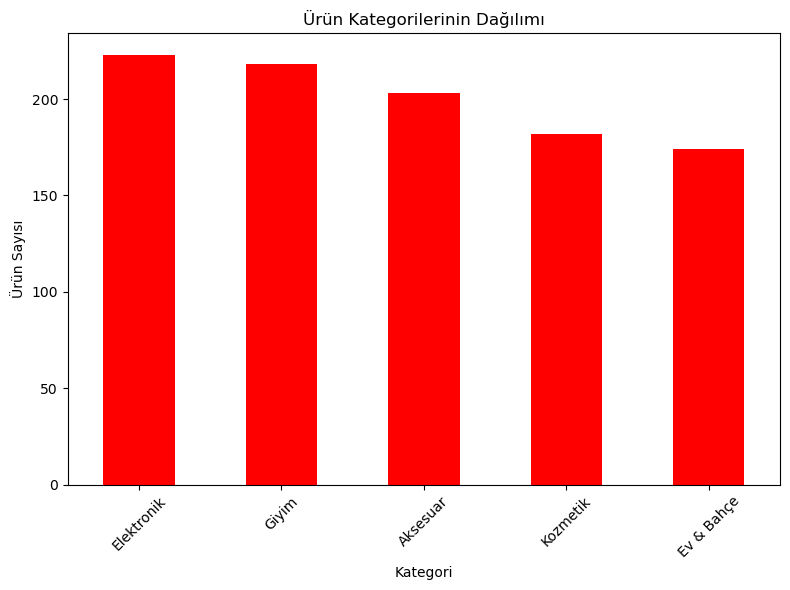

In [18]:
# Bar grafiği oluşturalım
plt.figure(figsize=(8, 6))
kategori_counts.plot(kind='bar', color='red')
plt.title('Ürün Kategorilerinin Dağılımı')
plt.xlabel('Kategori')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

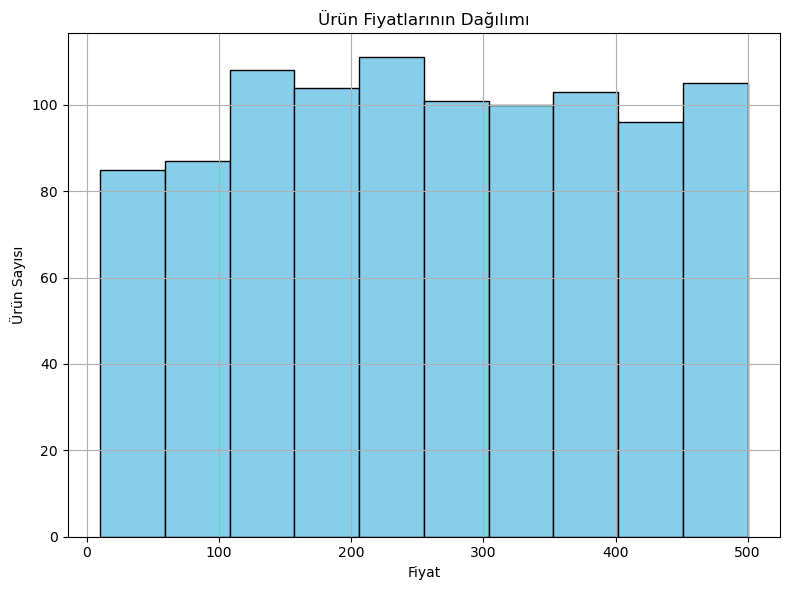

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(data['Fiyat'], bins=10, color='skyblue', edgecolor='black')
plt.title('Ürün Fiyatlarının Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Ürün Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
import seaborn as sns

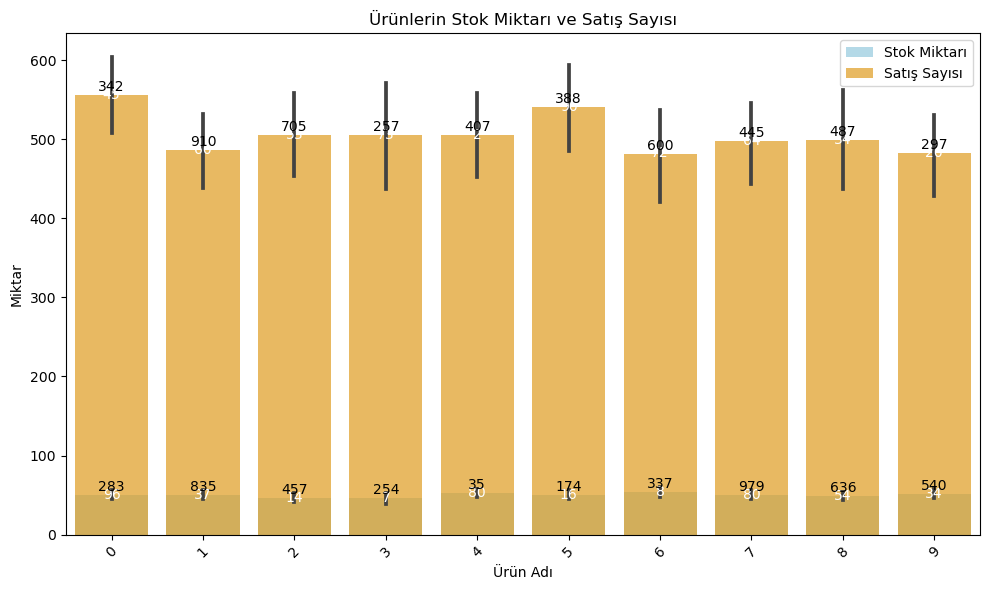

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ürün Adı', y='Stok Miktarı', data=df, color='skyblue', alpha=0.7, label='Stok Miktarı')
sns.barplot(x='Ürün Adı', y='Satış Sayısı', data=df, color='orange', alpha=0.7, label='Satış Sayısı')


for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, df.iloc[i]['Stok Miktarı'], ha='center', color='white', fontsize=10)
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, df.iloc[i]['Satış Sayısı'], ha='center', color='black', fontsize=10)

plt.title('Ürünlerin Stok Miktarı ve Satış Sayısı')
plt.xlabel('Ürün Adı')
plt.ylabel('Miktar')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**4. Veri Ön İşleme ve Sayısallaştırma**

Kategorik Değişkenlerin Kodlanması: Kategorik değişkenleri sayısal değerlere dönüştürün (örneğin, one-hot encoding veya label encoding).

Özellik Seçimi: Model için önemli olabilecek özellikleri seçin.

Veri Normalizasyonu: Sayısal özellikleri normalize edin.


In [22]:
#yukarda yapıldı 

In [23]:
df.columns

Index(['Ürün Adı', 'Kategori', 'Marka', 'Fiyat', 'Stok Miktarı',
       'Satış Sayısı', 'Yorum Sayısı', 'Ortalama Puan', 'Tarih'],
      dtype='object')

In [24]:
# Hedef değişkeni belirleme (Satış Sayısı 50'den fazla mı?)
df['Hedef'] = df['Satış Sayısı'].apply(lambda x: 1 if x > 50 else 0)

# Özellikler ve hedef değişkeni ayırma
X = df[['Fiyat', 'Stok Miktarı', 'Yorum Sayısı', 'Ortalama Puan']]
y = df['Hedef']

# Eğitim ve test kümelerine ayırma (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim kümesi boyutu: {X_train.shape}")
print(f"Test kümesi boyutu: {X_test.shape}")


Eğitim kümesi boyutu: (800, 4)
Test kümesi boyutu: (200, 4)


In [30]:
 # normalizasyon

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(X)

# Normalize edilmiş özellikleri DataFrame olarak saklayabiliriz
x_normalized = pd.DataFrame(x_scaler, columns=X.columns)
x_normalized.head()


,Fiyat,Stok Miktarı,Yorum Sayısı,Ortalama Puan
0,0.091837,0.96,0.02,0.225
1,0.224490,0.37,0.22,0.750
2,0.204082,0.14,0.06,0.475
3,0.251020,0.07,0.16,0.925
4,0.526531,0.80,0.24,0.625


**5. Model Oluşturma ve Değerlendirme**

Veri Setinin Bölünmesi: Veri setini eğitim ve test kümelerine ayırın.

Model Seçimi: Uygun bir model seçin (örneğin, Logistic Regression, Decision Trees, Random Forest vb.).

Model Eğitimi: Seçilen modeli eğitin.

Model Değerlendirmesi: Modelin performansını değerlendirin (örneğin, doğruluk, hassasiyet, geri çağırma gibi metrikler kullanarak).

In [31]:
#x ve y değerlerimiz belli

model = LogisticRegression()
model.fit(X_train, y_train)


# Test verisi ile tahmin yapma
y_pred = model.predict(X_test)

# Performans değerlendirmesi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Doğruluk: {accuracy:.2f}")
print(f"Hassasiyet: {precision:.2f}")
print(f"Geri Çağırma: {recall:.2f}")



Doğruluk: 0.93
Hassasiyet: 0.93
Geri Çağırma: 1.00


In [32]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Modeli eğit
    y_pred = clf.predict(X_test)  # Test seti üzerinde tahmin yap
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    clas_rapor = classification_report(y_test, y_pred)  # Sınıflandırma raporunu oluştur
    
    # Sonuçlar
    print(f"---- {clf_name} ----")
    print(f"Doğruluk (Accuracy): {accuracy:.2f}")
    print(f"Hassasiyet (Precision): {precision:.2f}")
    print(f"Geri Çağırma (Recall): {recall:.2f}")
    
    print("\nRapor (Classification Report):")
    print(clas_rapor)
    print()


---- Decision Tree ----
Doğruluk (Accuracy): 0.88
Hassasiyet (Precision): 0.92
Geri Çağırma (Recall): 0.95

Rapor (Classification Report):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.92      0.95      0.93       185

    accuracy                           0.88       200
   macro avg       0.46      0.47      0.47       200
weighted avg       0.85      0.88      0.86       200


---- Gradient Boosting ----
Doğruluk (Accuracy): 0.93
Hassasiyet (Precision): 0.93
Geri Çağırma (Recall): 1.00

Rapor (Classification Report):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.93      1.00      0.96       185

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200


---- SVC ----
Doğruluk (Accuracy): 0.93
Hassasiyet (Precision)